# Video Games Sales

In [40]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)

%pylab inline

from pylab import rcParams
rcParams['figure.figsize'] = 10, 7
import pandas as pd
import seaborn as sns

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('Video_Games_Sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
print(df.shape)
df = df.dropna()
print(df.shape)

(16719, 16)
(6825, 16)


In [8]:
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

In [47]:
df.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16667,E.T. The Extra-Terrestrial,GBA,2001,Action,NewKidCo,0.01,0.00,0.0,0.0,0.01,46.0,4,2.4,21,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,Midway Games,0.01,0.00,0.0,0.0,0.01,81.0,12,8.8,9,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,Konami Digital Entertainment,0.00,0.01,0.0,0.0,0.01,80.0,20,7.6,412,Kojima Productions,M
16700,Breach,PC,2011,Shooter,Destineer,0.01,0.00,0.0,0.0,0.01,61.0,12,5.8,43,Atomic Games,T
16706,STORM: Frontline Nation,PC,2011,Strategy,Unknown,0.00,0.01,0.0,0.0,0.01,60.0,12,7.2,13,SimBin,E10+


График продаж в зависимости от года

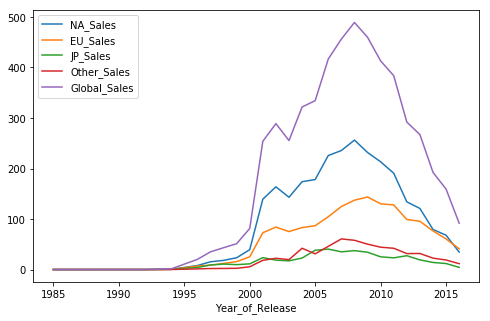

In [14]:
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
sales_df.groupby('Year_of_Release').sum().plot()

Список всех платформ

In [23]:
pd.unique(df['Platform'].values)

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'PS', 'XB', 'PC',
       'PSP', 'WiiU', 'GC', 'GBA', 'XOne', 'PSV', 'DC'], dtype=object)

Зависимости признаков

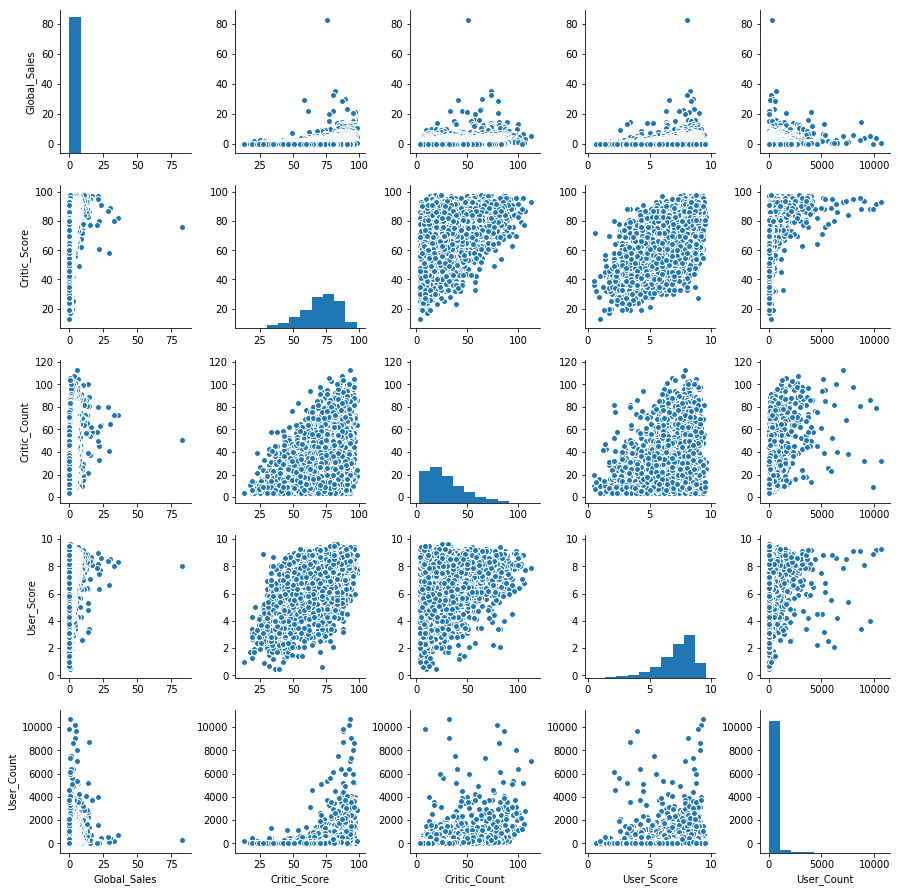

In [24]:
cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
sns_plot = sns.pairplot(df[cols])

Распределение оценок пользователей 

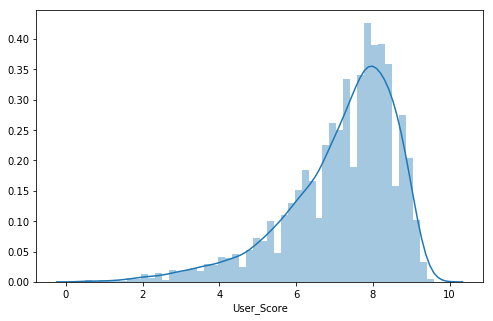

In [25]:
sns.distplot(df['User_Score'])

Взаимосвязь оценок пользователей и критиков

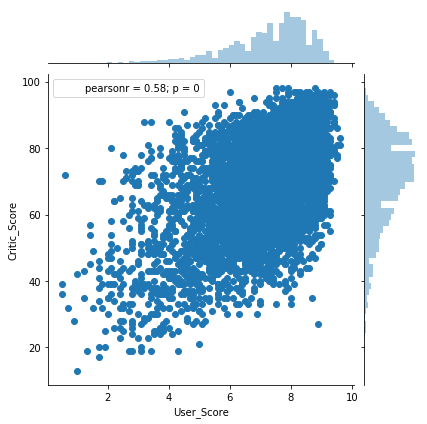

In [38]:
sns.jointplot(df['User_Score'], df['Critic_Score'])

Оценки критиков по платформам

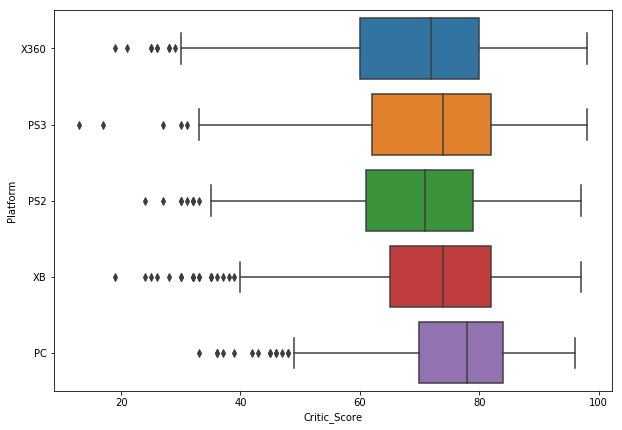

In [37]:
top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="Platform", x="Critic_Score", data=df[df.Platform.isin(top_platforms)], orient="h")

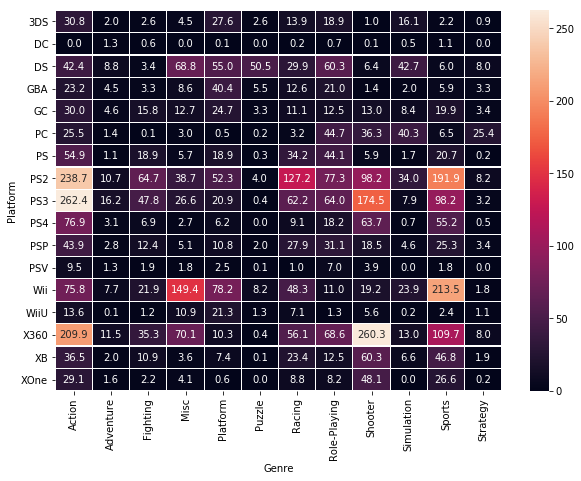

In [36]:
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.10)

In [45]:
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count()
)
years_df.columns = ['Global_Sales', 'Number_of_Games']

trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.Global_Sales,
    name='Global Sales'
)

trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Number_of_Games,
    name='Number of games released'
)

data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [46]:
data = []
for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre==genre].Critic_Score, name=genre)
    )

iplot(data, show_link = False)